In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
q1 = df.chol.quantile(0.25)
q3 = df.chol.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
df=df[df["chol"] < upper_limit]

In [5]:
q1 = df.trestbps.quantile(0.25)
q3 = df.trestbps.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
df=df[df["trestbps"] < upper_limit]

In [6]:
q1 = df.thalach.quantile(0.25)
q3 = df.thalach.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
df=df[df["thalach"] > lower_limit]

In [7]:
oldpeak_q1 = df.oldpeak.quantile(0.25)
oldpeak_q3 = df.oldpeak.quantile(0.75)
oldpeak_IQR = oldpeak_q3 - oldpeak_q1
oldpeak_lower_limit = oldpeak_q1 - 1.5 * oldpeak_IQR
oldpeak_upper_limit = oldpeak_q3 + 1.5 * oldpeak_IQR
df=df[df["oldpeak"] < oldpeak_upper_limit]

<AxesSubplot:>

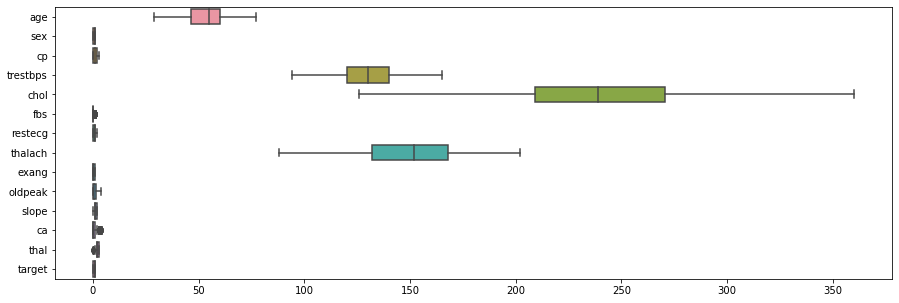

In [8]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,orient='h')

In [9]:
y = df["target"]
x = df.drop("target", axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [10]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
from sklearn.ensemble import RandomForestClassifier
Forest_Model = RandomForestClassifier(n_estimators = 100, oob_score = True, n_jobs = 1, random_state = 1)
Forest_Model.fit(x_train, y_train)
y_hat_forest = Forest_Model.predict(x_test)
y_hat_forest

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [12]:
np.array(y_test)

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1])

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

<AxesSubplot:>

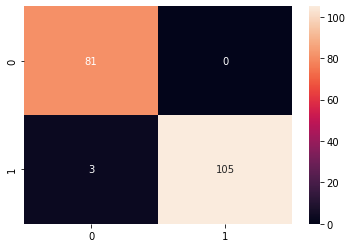

In [14]:
sns.heatmap(confusion_matrix(y_test, y_hat_forest), annot=True, fmt='g')

In [15]:
#Precision
RFPrecision = 81 / (0 + 81)
print(RFPrecision)

1.0


In [16]:
RFRecall = 81 / (3+81)
print(RFRecall)

0.9642857142857143


In [17]:
RFAccuracy = (81+105) / (81+105+3+0)
print(RFAccuracy)

0.9841269841269841


In [18]:
RFF1 = (2 * RFPrecision * RFRecall) / (RFPrecision + RFRecall)
print(RFF1)

0.9818181818181818


In [19]:
total_squared_error_RF = (np.sum((y_test - y_hat_forest)**2))
mean_squared_error_RF = total_squared_error_RF/len(y_test)
print(mean_squared_error_RF)



0.015873015873015872


In [20]:
recall_score(y_test, y_hat_forest)

0.9722222222222222

**Finding best parameters**


In [21]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')




In [22]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV as gs

In [23]:
# parameters = {n_estimators:(100),  'kernel': ('linear', 'rbf'), bootstrap=False} 'C':[1,10]
# metrics = ['recall']
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators':(50, 100), 'bootstrap':(True, False), 'min_samples_leaf':(5, 10), 'oob_score':(True, False), 'warm_start':(True, False)}

# #parameters = np.array(parameters)
# #parameters

# Need couple options for params, put in listor tuple

In [24]:
Forest_Model = RandomForestClassifier(n_estimators = 100, oob_score = True, n_jobs = 1, random_state = 1)
Empty_Model = RandomForestClassifier()

In [25]:
svc = svm.SVC()
clf = gs(Empty_Model, parameters, scoring = 'recall')
clf.fit(x_train, y_train)

# instance of rf class, create new var instance of empty w/ no arguments



GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': (True, False),
                         'min_samples_leaf': (5, 10), 'n_estimators': (50, 100),
                         'oob_score': (True, False),
                         'warm_start': (True, False)},
             scoring='recall')

In [26]:
clf.best_estimator_

RandomForestClassifier(bootstrap=False, min_samples_leaf=5, n_estimators=50,
                       warm_start=True)

In [27]:
clf.best_params_
# Best params so far: {'bootstrap': False, 'min_samples_leaf': 5, 'n_estimators': 50, 'oob_score': False,'warm_start': True}

{'bootstrap': False,
 'min_samples_leaf': 5,
 'n_estimators': 50,
 'oob_score': False,
 'warm_start': True}

In [28]:
clf.best_score_

0.9697151898734176

In [29]:
#Best Model
parameters = {'n_estimators':(50), 'bootstrap':(False), 'min_samples_leaf':(5),'oob_score':(False), 'warm_start':(True)}



In [30]:
clf.cv_results_

{'mean_fit_time': array([0.12709875, 0.12587357, 0.13146801, 0.09589314, 0.25749006,
        0.25493488, 0.20207176, 0.20102744, 0.1217751 , 0.12446661,
        0.09491587, 0.10405378, 0.24778771, 0.33611035, 0.26817784,
        0.30129957, 0.00285897, 0.00439553, 0.1298799 , 0.07935948,
        0.00059428, 0.00054874, 0.15817952, 0.15162096, 0.00062828,
        0.00091639, 0.15390301, 0.08900981, 0.00060854, 0.00055857,
        0.16055989, 0.20687199]),
 'std_fit_time': array([3.41474377e-03, 1.98570837e-03, 7.37340841e-02, 4.49824127e-03,
        2.77988385e-02, 1.99328195e-02, 2.97821363e-02, 2.15051066e-02,
        1.92318574e-03, 4.16462631e-03, 2.48136069e-03, 2.10018374e-02,
        1.08094074e-02, 1.38787984e-01, 7.30825431e-02, 1.74155803e-01,
        3.81208363e-03, 3.62862754e-03, 1.01543577e-01, 2.85349137e-03,
        7.74172110e-05, 3.50391287e-05, 1.24634779e-02, 1.91290799e-03,
        6.21680091e-05, 1.94066959e-04, 1.17742619e-01, 1.50419494e-02,
        1.11786191e-0

# **The best model turns out to be a RandomForestClassifier instance with n\_estimators = \(50\), bootstrap = \(False\), min\_samples\_leaf = \(5\), oob\_score = \(False\), warm\_start = \(True\).**



In [31]:
Best_Model = RandomForestClassifier(n_estimators = (50), bootstrap = (False), min_samples_leaf = (5), oob_score = (False), warm_start = (True))

In [32]:
y = df["target"]
x = df.drop("target", axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)


In [33]:
x_best_train = scaler.fit_transform(x_train)
x_best_test = scaler.transform(x_test)
Best_Model.fit(x_best_train, y_train)
y_hat_forest = Best_Model.predict(x_best_test)


# Recall score: recall\_score\(y\_test, y\_hat\_forest\)



In [34]:
recall_score(y_test, y_hat_forest)

0.9907407407407407

<AxesSubplot:>

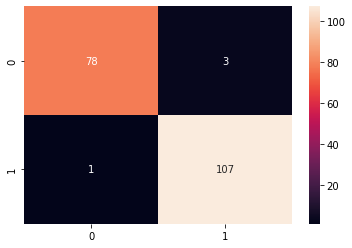

In [35]:
# Heatmap
sns.heatmap(confusion_matrix(y_test, y_hat_forest), annot=True, fmt='g')